# Proyecto Final de Gestión de Bases de Datos (SI424): Análisis de la Evolución de Graduados de la UPSA

Listado histórico de graduados de la UPSA (Gestiones 1988-2022).

Fuente de datos: [Graduados UPSA](https://www.upsa.edu.bo/es/graduados-upsa).

La extracción de datos se realiza con Excel mediante *importación de datos desde Internet*, lo cual genera 163 hojas de cálculo (gestión y facultad) en formato `.xlsx`.

El objetivo es primeramente consolidar, limpiar y normalizar los datos de inconsistencias y errores, siendo los nombres de las carreras. Posteriormente, se hará un mapping agregando una nueva columna de `Facultad`, indicando la facultad a la que pertenece cada carrera.

Entre los análisis a realizar, se encuentran:

- **Evolución de graduados en general**:
  - Año
  - Facultad
  - Carrera
- **Análisis del comportamiento a través del tiempo**:
  - Identificar si existe algún patrón de comportamiento, y si es posible predecir el número de graduados en general para los próximo años:
    - Carrera
    - Facultad
- **Indicadores estadísticos generales**:
  - Máximo
  - Mínimo
  - Media
  - Mediana
  - Etc.

## Librerías a usar

In [1]:
%pip install pandas matplotlib seaborn statsmodels numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

## Importación de datos

`./Graduados de la UPSA.xlsx` contiene 163 hojas de cálculo, cada una con la información de graduados de una gestión y facultad específica. Este es el Excel resultante de la *importación de datos desde Internet*.

Consiguiente a la importación, se procede a unir todas las hojas en 1 solo Excel para el análisis. Como todas las hojas tiene la misma siguiente estructura:

- `Nombre`
- `Carrera`
- `Fecha Defensa`
- `Año`

In [3]:
# Path to the Excel file with multiple sheets
graduates_excel_file_path = 'Graduados de la UPSA.xlsx'

def merge_excel_sheets(file_path: str) -> pd.DataFrame:
    # Read the Excel file with all sheets
    excel_workbook = pd.ExcelFile(file_path)
    
    # List to store DataFrames from each sheet
    combined_excel_sheets = []
        
    # Iterate through all sheets
    for sheet_name in excel_workbook.sheet_names:
        # Read each sheet, selecting only the first 4 columns
        sheet_data = pd.read_excel(file_path, sheet_name=sheet_name, usecols=['Nombre', 'Carrera', 'Fecha Defensa', 'Año'])
        
        # Add a column to track the original sheet name if needed
        sheet_data['Sheet_Origin'] = sheet_name
        
        # Append to the list of DataFrames
        combined_excel_sheets.append(sheet_data)
    
    # Concatenate all DataFrames vertically
    return pd.concat(combined_excel_sheets, ignore_index=True)

# Merge the sheets
consolidated_graduate_data = merge_excel_sheets(graduates_excel_file_path)

# Optional: Display basic information about the merged DataFrame
print(f"Total number of records: {len(consolidated_graduate_data)}")
print("\nFirst few rows:")
print(consolidated_graduate_data.head())

# Save the merged DataFrame to a new Excel file
consolidated_graduate_data.to_excel('UPSA_Graduates_Consolidated.xlsx', index=False)

Total number of records: 10257

First few rows:
                          Nombre                                 Carrera  \
0           ANTELO SCOTT ROBERTO  COMUNICACION ESTRATEGICA Y CORPORATIVA   
1     ARIAS MEDINA SUSANA ESTHER  COMUNICACION ESTRATEGICA Y CORPORATIVA   
2      ROCA URIOSTE VANYA MÓNICA  COMUNICACION ESTRATEGICA Y CORPORATIVA   
3  SANJINÉS ZACONETA PEGGY ERIKA  COMUNICACION ESTRATEGICA Y CORPORATIVA   
4     CORTEZ UZEDA MARCO ANTONIO              ADMINISTRACION DE EMPRESAS   

  Fecha Defensa   Año Sheet_Origin  
0    1988-12-15  1988    Table 163  
1    1988-12-15  1988    Table 163  
2    1988-12-14  1988    Table 163  
3    1988-12-14  1988    Table 163  
4    1988-12-14  1988    Table 162  


### Unión de hojas de cálculo

Una vez finalizada la unión de todas las hojas de cálculo, se procede a la limpieza y normalización de los datos.

Entre los resultados obtenidos, se tiene un total de **10,257 registros de graduados**.

### Limpieza y normalización de datos

Ahora se procede a la limpieza y normalización de los datos, siendo el primer paso la normalización de los nombres de las carreras.

Primeramente se busca todos los valores únicos de la columna `Carrera` para identificar las inconsistencias y errores.

In [4]:
# Use the new Excel with the merged data for further analysis
consolidated_graduate_data = pd.read_excel('UPSA_Graduates_Consolidated.xlsx')
print("Consolidated data:")
print(consolidated_graduate_data.head())

# Print all values in the 'Carrera' column
unique_careers = consolidated_graduate_data['Carrera'].unique()
print("\n\nUnique career values:")
print("\n".join(sorted(unique_careers)))

Consolidated data:
                          Nombre                                 Carrera  \
0           ANTELO SCOTT ROBERTO  COMUNICACION ESTRATEGICA Y CORPORATIVA   
1     ARIAS MEDINA SUSANA ESTHER  COMUNICACION ESTRATEGICA Y CORPORATIVA   
2      ROCA URIOSTE VANYA MÓNICA  COMUNICACION ESTRATEGICA Y CORPORATIVA   
3  SANJINÉS ZACONETA PEGGY ERIKA  COMUNICACION ESTRATEGICA Y CORPORATIVA   
4     CORTEZ UZEDA MARCO ANTONIO              ADMINISTRACION DE EMPRESAS   

  Fecha Defensa   Año Sheet_Origin  
0    1988-12-15  1988    Table 163  
1    1988-12-15  1988    Table 163  
2    1988-12-14  1988    Table 163  
3    1988-12-14  1988    Table 163  
4    1988-12-14  1988    Table 162  


Unique career values:
ADMINISTRACION DE EMPRESAS
ADMINISTRACIÓN DE EMPRESAS
ANALISIS Y PROGRAMACION DE SISTEMAS
ARQUITECTURA
AUDITORIA Y FINANZAS
AUDITORÍA Y FINANZAS
Administración De Empresas
Arquitectura
Auditoria Y Finanzas
COMERCIO INTERNACIONAL
COMUNICACION ESTRATEGICA Y CORPORATIVA
COMUNICACI

In [5]:
import json

# Load the JSON file with the career categories
with open('./career_mapping.json', 'r', encoding='utf-8') as json_file:
    career_mapping = json.load(json_file)

# Clean the career names
def clean_career_names(df):
    df["Carrera"] = df["Carrera"].replace(career_mapping)

    return df


consolidated_graduate_data = clean_career_names(consolidated_graduate_data)

print("Unique values after cleaning:")
after_cleaning = consolidated_graduate_data["Carrera"].unique()
print("\n".join(sorted(after_cleaning)))

# Save the cleaned data to a new Excel file
consolidated_graduate_data.to_excel('UPSA_Graduates_Consolidated_Clean.xlsx', index=False)

Unique values after cleaning:
Administración De Empresas
Análisis Y Programación De Sistemas
Arquitectura
Auditoría Y Finanzas
Comercio Internacional
Comunicación Estratégica Y Corporativa
Construcciones
Contaduría General
Decoración De Interiores Y Paisajismo
Derecho
Diseño De Interiores
Diseño Gráfico
Diseño Gráfico Y Publicitario
Diseño Industrial
Diseño Y Gestión De La Moda
Ingeniería Civil
Ingeniería Comercial
Ingeniería De Petróleo Y Gas Natural
Ingeniería De Redes Y Telecomunicaciones
Ingeniería De Sistemas
Ingeniería Económica
Ingeniería Electrónica
Ingeniería En Madera
Ingeniería En Redes Y Telecomunicaciones
Ingeniería Financiera
Ingeniería Industrial En Madera
Ingeniería Industrial Y De Sistemas
Ingeniería Informática Administrativa
Marketing Y Publicidad
Periodismo
Psicología


### Facultades

Una vez normalizados los nombres de las carreras, se procede a realizar un mapping de las carreras a las facultades a las que pertenecen.

In [6]:
with open ('./faculty_mapping.json', 'r', encoding='utf-8') as json_file:	
    faculties_mapping = json.load(json_file)

consolidated_graduate_data["Facultad"]=consolidated_graduate_data["Carrera"].map(faculties_mapping)

# Display the first few rows of the updated DataFrame
print("First few rows of the updated DataFrame:")
print(consolidated_graduate_data.head())

# Save the cleaned data to a new Excel file
consolidated_graduate_data.to_excel('UPSA_Graduates_Consolidated_Clean_Faculty.xlsx', index=False)

First few rows of the updated DataFrame:
                          Nombre                                 Carrera  \
0           ANTELO SCOTT ROBERTO  Comunicación Estratégica Y Corporativa   
1     ARIAS MEDINA SUSANA ESTHER  Comunicación Estratégica Y Corporativa   
2      ROCA URIOSTE VANYA MÓNICA  Comunicación Estratégica Y Corporativa   
3  SANJINÉS ZACONETA PEGGY ERIKA  Comunicación Estratégica Y Corporativa   
4     CORTEZ UZEDA MARCO ANTONIO              Administración De Empresas   

  Fecha Defensa   Año Sheet_Origin                             Facultad  
0    1988-12-15  1988    Table 163  Humanidades, Comunicaciones Y Artes  
1    1988-12-15  1988    Table 163  Humanidades, Comunicaciones Y Artes  
2    1988-12-14  1988    Table 163  Humanidades, Comunicaciones Y Artes  
3    1988-12-14  1988    Table 163  Humanidades, Comunicaciones Y Artes  
4    1988-12-14  1988    Table 162               Ciencias Empresariales  


## Análisis de los datos

### Evolución de graduados

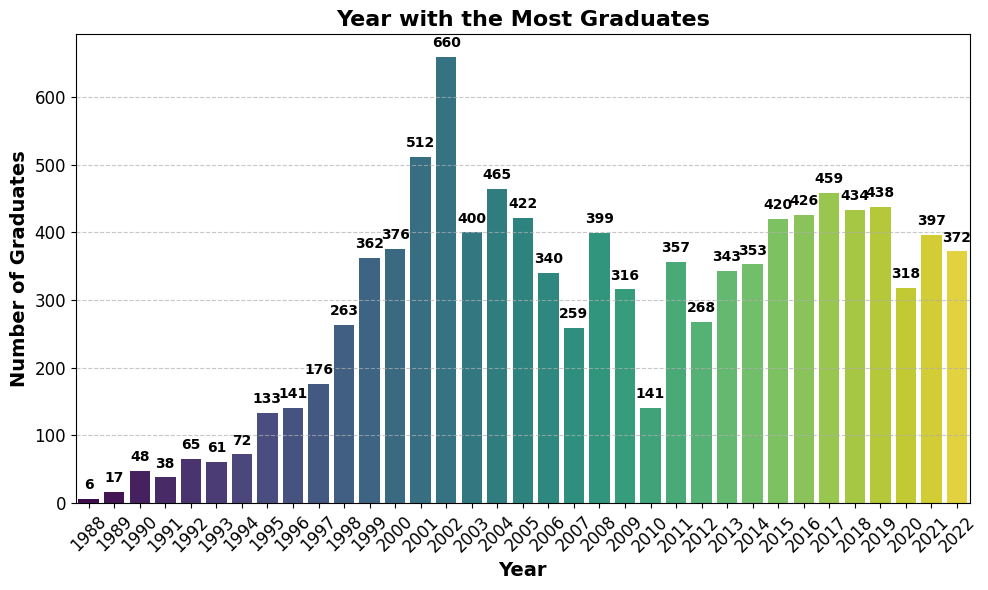

In [7]:
graduates_per_year = consolidated_graduate_data["Año"].value_counts().sort_index()

# Plot for the year with the most graduates
plt.figure(figsize=(10, 6))
sns.barplot(
    x=graduates_per_year.index,
    y=graduates_per_year.values,
    palette="viridis",
    hue=graduates_per_year.index,
    dodge=False,
    legend=False,
)

for index, value in enumerate(graduates_per_year.values):
    plt.text(
        index,
        value + 10,
        str(value),
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

plt.title("Year with the Most Graduates", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14, fontweight="bold")
plt.ylabel("Number of Graduates", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

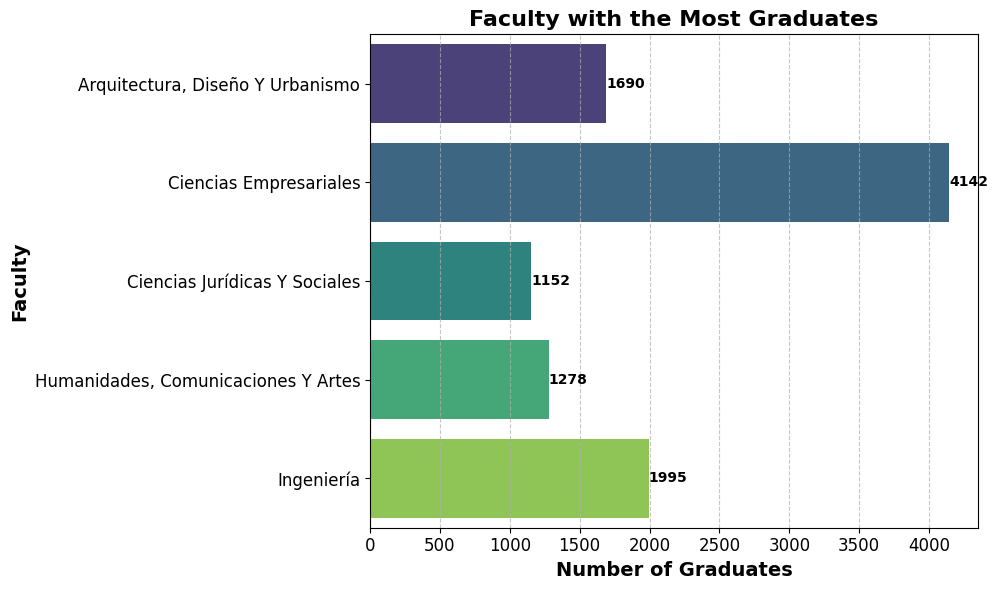

In [8]:
graduates_per_faculty = consolidated_graduate_data["Facultad"].value_counts().sort_index()


# Plot for the faculty with the most graduates
plt.figure(figsize=(10, 6))
sns.barplot(x=graduates_per_faculty.values, y=graduates_per_faculty.index, palette="viridis", hue=graduates_per_faculty.index, dodge=False, legend=False)

for index, value in enumerate(graduates_per_faculty.values):
    plt.text(value, index, str(value), ha="left", va="center", fontsize=10, fontweight="bold")
    
plt.title("Faculty with the Most Graduates", fontsize=16, fontweight="bold")
plt.xlabel("Number of Graduates", fontsize=14, fontweight="bold")
plt.ylabel("Faculty", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

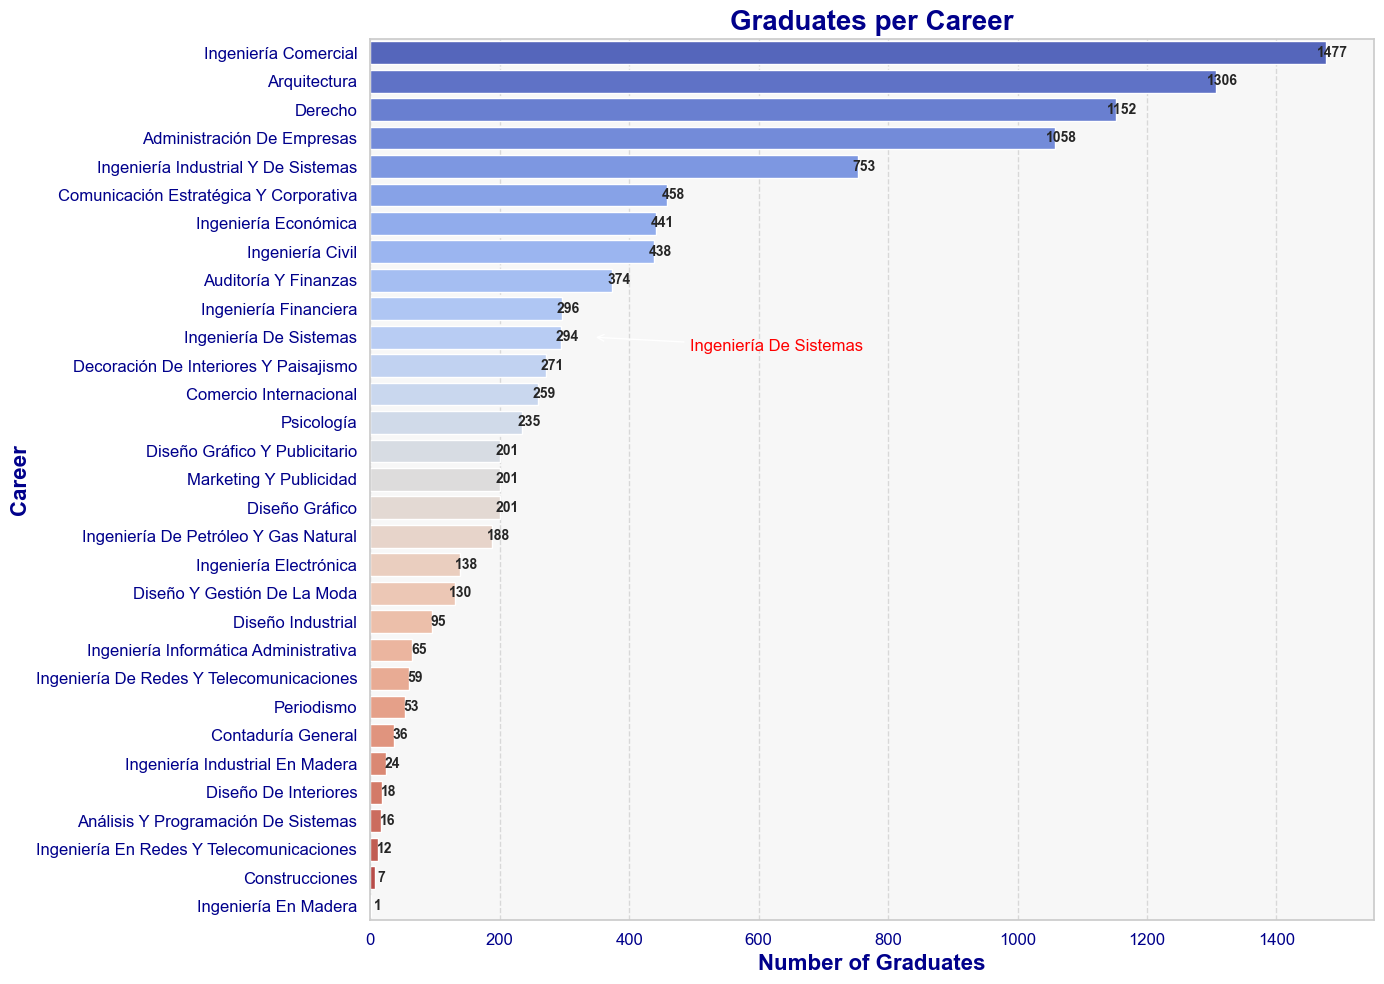

In [9]:
graduates_per_career = consolidated_graduate_data["Carrera"].value_counts().sort_values(ascending=False)

# Set the style
sns.set_theme(style="whitegrid")

# Plot for the graduates per career
plt.figure(figsize=(14, 10))
barplot = sns.barplot(y=graduates_per_career.index, x=graduates_per_career.values, palette="coolwarm", hue=graduates_per_career.index, dodge=False, legend=False)

# Add data labels
for index, value in enumerate(graduates_per_career.values):
    barplot.text(value + 10, index, str(value), ha='center', va='center', fontsize=10, fontweight='bold')

# Customize the plot
plt.title("Graduates per Career", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Number of Graduates", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Career", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add annotations for specific careers (optional)
highlight_careers = ["Ingeniería De Sistemas"]
for career in highlight_careers:
    if career in graduates_per_career.index:
        plt.annotate(f'{career}', xy=(graduates_per_career[career] + 50, graduates_per_career.index.get_loc(career)),
                     xytext=(graduates_per_career[career] + 200, graduates_per_career.index.get_loc(career) + 0.5),
                     arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='red')

# Add a subtle background color
plt.gca().set_facecolor('#f7f7f7')

# Adjust layout
plt.tight_layout()
plt.show()

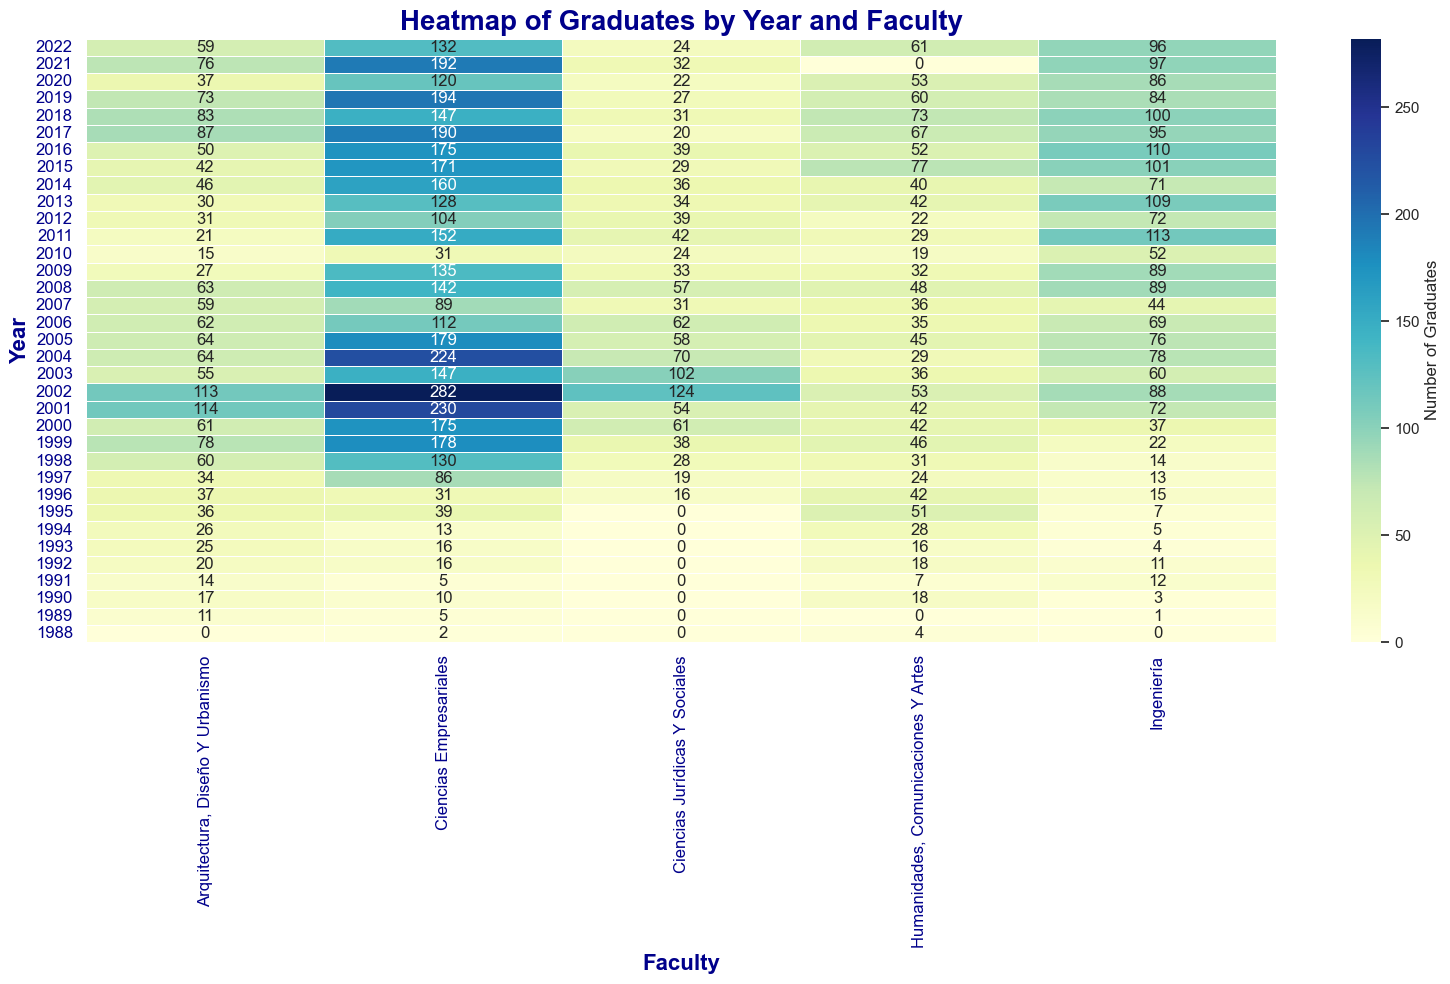

In [10]:
# Graduates by year and faculty
graduates_by_year_faculty = consolidated_graduate_data.pivot_table(index="Año", columns="Facultad", aggfunc="size", fill_value=0)
graduates_by_year_faculty = graduates_by_year_faculty.iloc[::-1]

# Plot for graduates by year and faculty
plt.figure(figsize=(16, 10))
sns.heatmap(graduates_by_year_faculty, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5, cbar_kws={'label': 'Number of Graduates'})

plt.title("Heatmap of Graduates by Year and Faculty", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Faculty", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Year", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

plt.tight_layout()
plt.show()

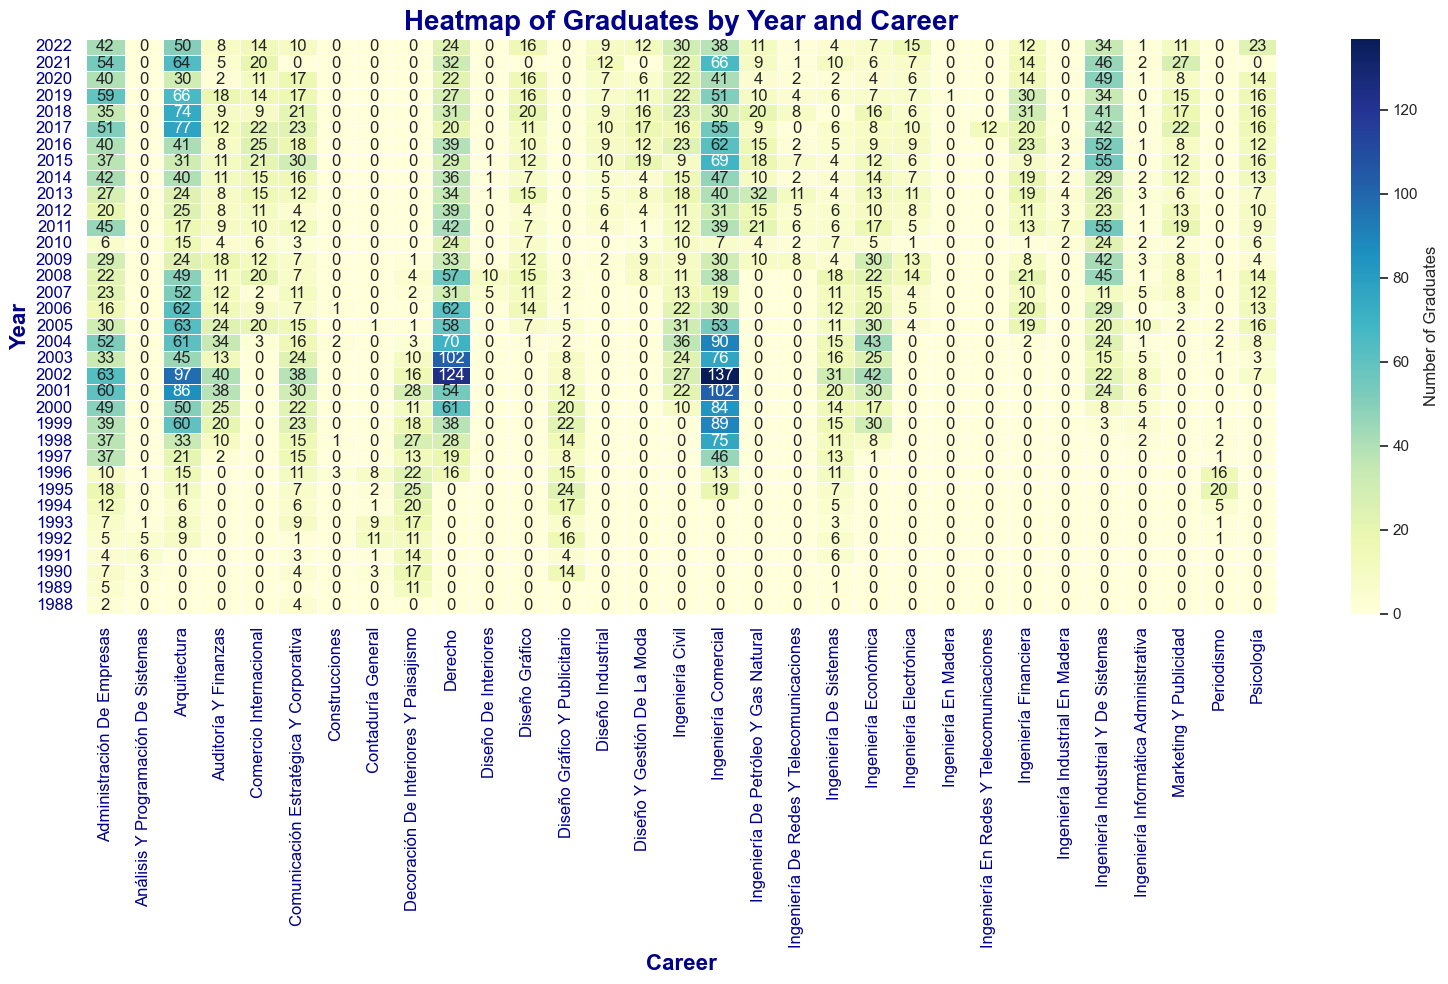

In [11]:
# Graduates by year and career
graduates_by_year_career = consolidated_graduate_data.pivot_table(index="Año", columns="Carrera", aggfunc="size", fill_value=0)
graduates_by_year_career = graduates_by_year_career.iloc[::-1]

# Plot for graduates by year and career
plt.figure(figsize=(16, 10))
sns.heatmap(graduates_by_year_career, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5, cbar_kws={'label': 'Number of Graduates'})


plt.title("Heatmap of Graduates by Year and Career", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Career", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Year", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

plt.tight_layout()
plt.show()

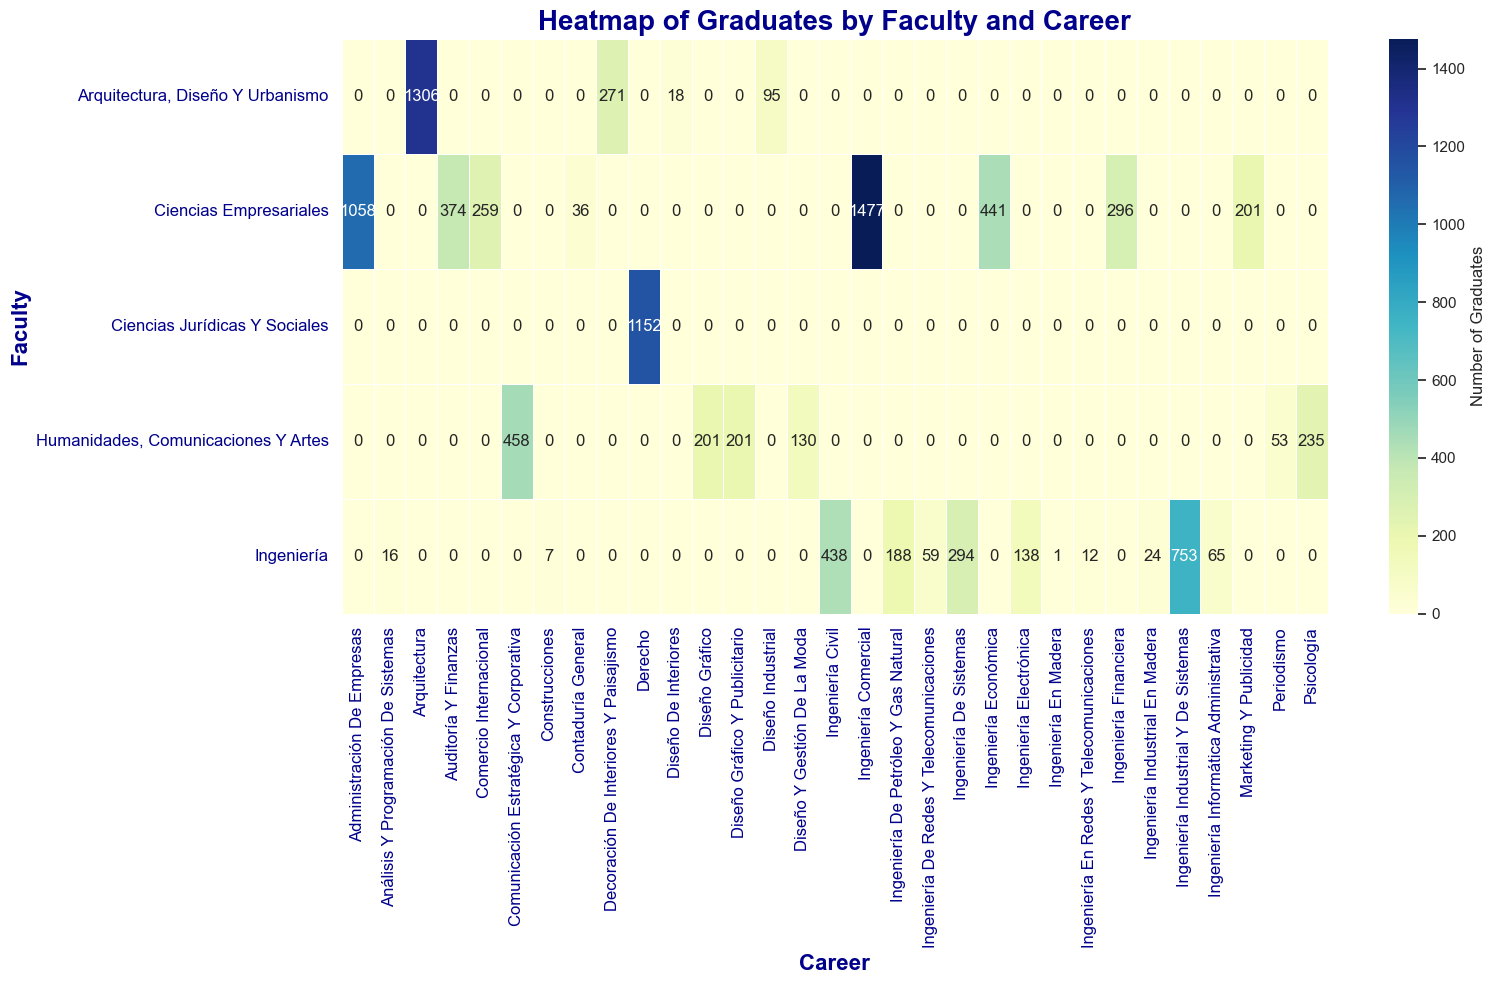

In [12]:
# Graduates by faculty and career
graduates_by_faculty_career = consolidated_graduate_data.pivot_table(index="Facultad", columns="Carrera", aggfunc="size", fill_value=0)

# Plot for graduates by faculty and career
plt.figure(figsize=(16, 10))
sns.heatmap(graduates_by_faculty_career, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5, cbar_kws={'label': 'Number of Graduates'})

plt.title("Heatmap of Graduates by Faculty and Career", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Career", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Faculty", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

plt.tight_layout()
plt.show()

### Análisis del comportamiento a través del tiempo

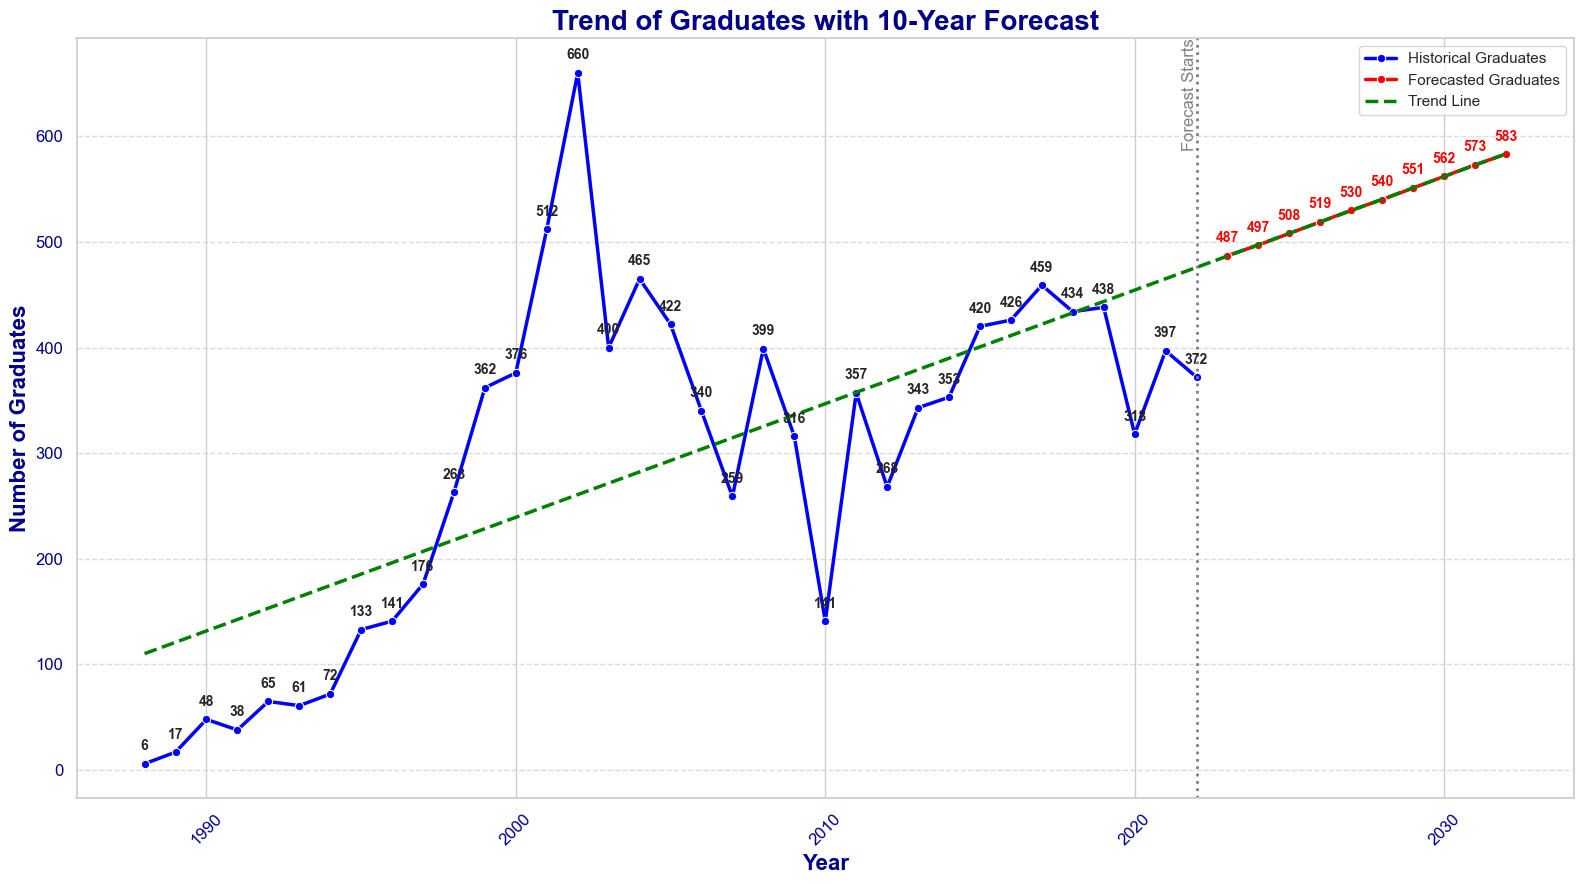

,Año,Count,Forecast
0,1988,6,False
1,1989,17,False
2,1990,48,False
3,1991,38,False
4,1992,65,False
5,1993,61,False
6,1994,72,False
7,1995,133,False
8,1996,141,False
9,1997,176,False


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def forecast_graduates(graduates_per_year):
    """
    Forecast graduates for the next 10 years using linear regression
    
    Parameters:
    graduates_per_year (pandas.DataFrame): DataFrame with 'Año' and 'Count' columns
    
    Returns:
    pandas.DataFrame: Forecast for next 10 years
    """
    # Prepare data for linear regression
    X = graduates_per_year['Año'].values.reshape(-1, 1)
    y = graduates_per_year['Count'].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Generate forecast years
    last_year = graduates_per_year['Año'].max()
    forecast_years = np.arange(last_year + 1, last_year + 11).reshape(-1, 1)

    # Predict graduates for forecast years
    forecast_counts = model.predict(forecast_years)

    # Create forecast DataFrame
    forecast_df = pd.DataFrame({
        'Año': forecast_years.flatten(),
        'Count': np.round(forecast_counts).astype(int),
        'Forecast': True
    })

    # Combine historical and forecast data
    full_data = pd.concat([
        graduates_per_year.assign(Forecast=False),
        forecast_df
    ]).sort_values('Año')

    return full_data, model

def plot_graduates_with_forecast(full_data, model):
    """
    Plot graduates trend with forecast
    
    Parameters:
    full_data (pandas.DataFrame): Combined historical and forecast data
    model (LinearRegression): Fitted linear regression model
    """
    # Set the style
    sns.set_theme(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(16, 9))

    # Plot historical data
    historical_data = full_data[full_data['Forecast'] == False]
    forecast_data = full_data[full_data['Forecast'] == True]

    # Line plot for historical data
    sns.lineplot(data=historical_data, x='Año', y='Count', marker='o', 
                 color='blue', linewidth=2.5, label='Historical Graduates')

    # Line plot for forecast data
    sns.lineplot(data=forecast_data, x='Año', y='Count', marker='o', 
                 color='red', linewidth=2.5, label='Forecasted Graduates')

    # Add trend line
    X_trend = full_data['Año'].values.reshape(-1, 1)
    y_trend = model.predict(X_trend)
    plt.plot(full_data['Año'], y_trend, color='green', linestyle='--', 
             linewidth=2.5, label='Trend Line')

    # Add data point labels for historical data
    for index, row in historical_data.iterrows():
        plt.text(row['Año'], row['Count'] + 10, str(row['Count']), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Add data point labels for forecast data
    for index, row in forecast_data.iterrows():
        plt.text(row['Año'], row['Count'] + 10, str(row['Count']), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')

    # Customize the plot
    plt.title("Trend of Graduates with 10-Year Forecast", fontsize=20, fontweight='bold', color='darkblue')
    plt.xlabel("Year", fontsize=16, fontweight='bold', color='darkblue')
    plt.ylabel("Number of Graduates", fontsize=16, fontweight='bold', color='darkblue')
    plt.xticks(rotation=45, fontsize=12, color='darkblue')
    plt.yticks(fontsize=12, color='darkblue')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add vertical line to separate historical and forecast data
    last_historical_year = historical_data['Año'].max()
    plt.axvline(x=last_historical_year, color='gray', linestyle=':', linewidth=2)
    plt.text(last_historical_year, plt.gca().get_ylim()[1], 'Forecast Starts', 
             rotation=90, va='top', ha='right', color='gray')

    # Add legend
    plt.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

    return full_data

# Assuming you have already created consolidated_graduate_data
# Example usage:
# graduates_per_year = consolidated_graduate_data.groupby("Año").size().reset_index(name='Count')
# full_forecast_data, regression_model = forecast_graduates(graduates_per_year)
# plot_graduates_with_forecast(full_forecast_data, regression_model)

# Assuming you have your consolidated_graduate_data
graduates_per_year = consolidated_graduate_data.groupby("Año").size().reset_index(name='Count')

# Generate forecast
full_forecast_data, regression_model = forecast_graduates(graduates_per_year)

# Plot with forecast
plot_graduates_with_forecast(full_forecast_data, regression_model)

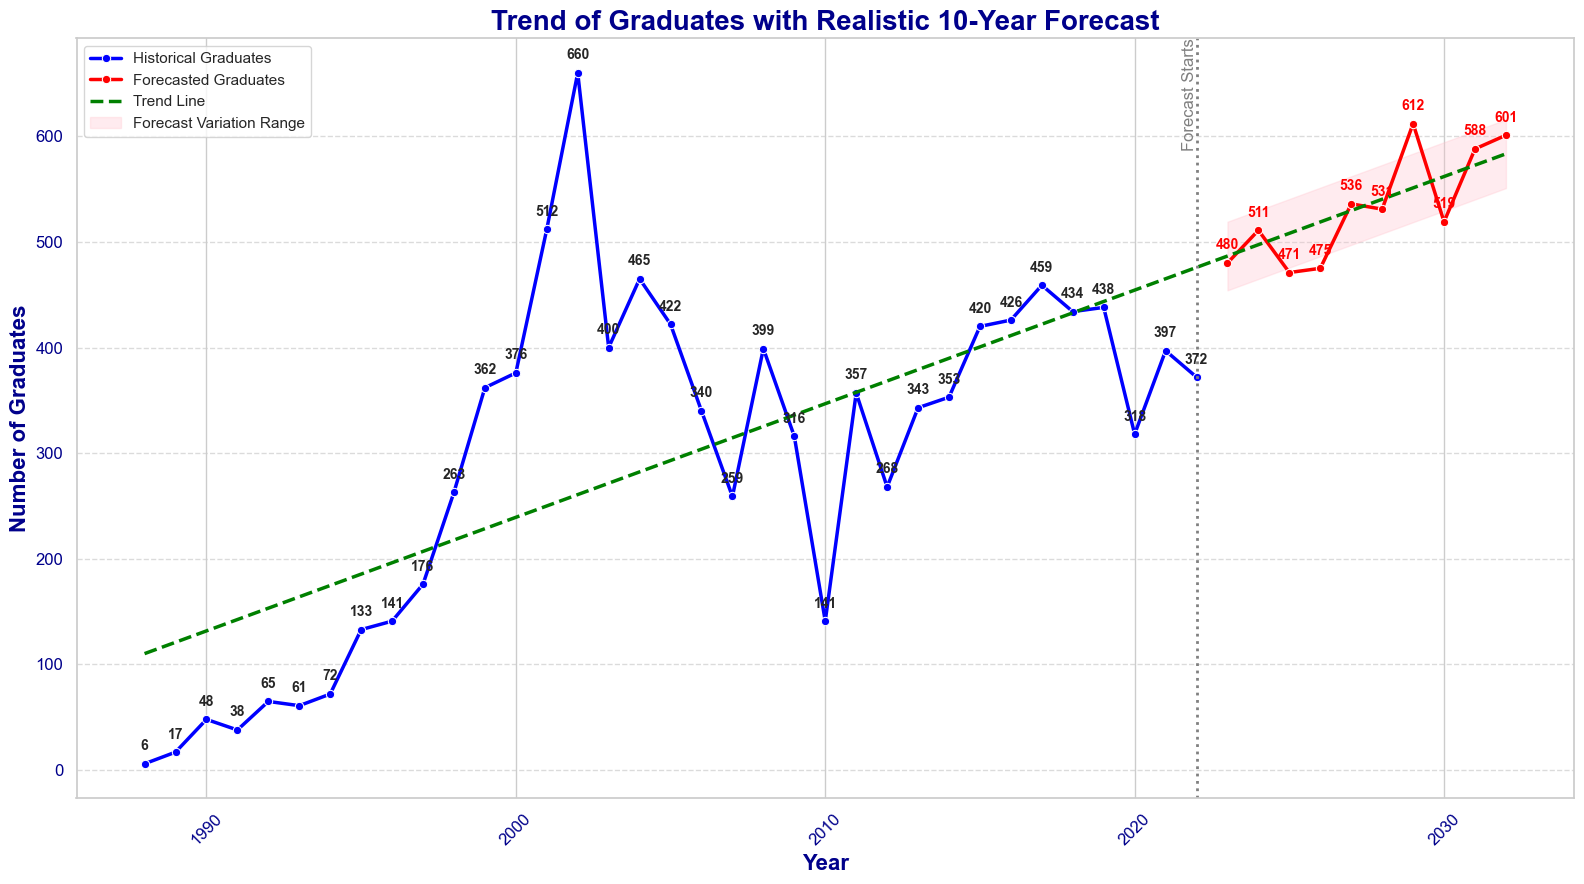

,Año,Count,Forecast
0,1988,6,False
1,1989,17,False
2,1990,48,False
3,1991,38,False
4,1992,65,False
5,1993,61,False
6,1994,72,False
7,1995,133,False
8,1996,141,False
9,1997,176,False


In [14]:

def realistic_forecast_graduates(graduates_per_year):
    """
    Generate a more realistic forecast with variations
    
    Parameters:
    graduates_per_year (pandas.DataFrame): DataFrame with 'Año' and 'Count' columns
    
    Returns:
    pandas.DataFrame: Forecast for next 10 years with realistic variations
    """
    # Prepare data for linear regression
    X = graduates_per_year['Año'].values.reshape(-1, 1)
    y = graduates_per_year['Count'].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Calculate standard deviation of historical data
    std_dev = np.std(y)

    # Generate forecast years
    last_year = graduates_per_year['Año'].max()
    forecast_years = np.arange(last_year + 1, last_year + 11).reshape(-1, 1)

    # Predict base graduates for forecast years
    base_forecast = model.predict(forecast_years)

    # Add random variation with controlled standard deviation
    # Reduce the standard deviation to make variations more subtle
    variation_scale = 0.2  # Adjust this to control the amount of randomness
    random_variations = np.random.normal(
        loc=0, 
        scale=std_dev * variation_scale, 
        size=len(forecast_years)
    )

    # Apply variations to base forecast
    forecast_counts = base_forecast + random_variations

    # Ensure forecast counts are not negative
    forecast_counts = np.maximum(forecast_counts, 0)

    # Create forecast DataFrame
    forecast_df = pd.DataFrame({
        'Año': forecast_years.flatten(),
        'Count': np.round(forecast_counts).astype(int),
        'Forecast': True
    })

    # Combine historical and forecast data
    full_data = pd.concat([
        graduates_per_year.assign(Forecast=False),
        forecast_df
    ]).sort_values('Año')

    return full_data, model, std_dev

def plot_graduates_with_realistic_forecast(full_data, model, std_dev):
    """
    Plot graduates trend with realistic forecast
    
    Parameters:
    full_data (pandas.DataFrame): Combined historical and forecast data
    model (LinearRegression): Fitted linear regression model
    std_dev (float): Standard deviation of historical data
    """
    # Set the style
    sns.set_theme(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(16, 9))

    # Plot historical data
    historical_data = full_data[full_data['Forecast'] == False]
    forecast_data = full_data[full_data['Forecast'] == True]

    # Line plot for historical data
    sns.lineplot(data=historical_data, x='Año', y='Count', marker='o', 
                 color='blue', linewidth=2.5, label='Historical Graduates')

    # Line plot for forecast data
    sns.lineplot(data=forecast_data, x='Año', y='Count', marker='o', 
                 color='red', linewidth=2.5, label='Forecasted Graduates')

    # Add trend line for entire dataset (historical + forecast)
    X_trend = full_data['Año'].values.reshape(-1, 1)
    y_trend = model.predict(X_trend)
    plt.plot(full_data['Año'], y_trend, color='green', linestyle='--', 
             linewidth=2.5, label='Trend Line')

    # Add confidence interval bands
    # Use standard deviation to create variation bands
    X_forecast = forecast_data['Año'].values.reshape(-1, 1)
    forecast_base = model.predict(X_forecast)
    
    # Create confidence interval
    confidence_interval = std_dev * 0.2  # Adjust multiplier to control band width
    plt.fill_between(
        forecast_data['Año'], 
        forecast_base - confidence_interval, 
        forecast_base + confidence_interval, 
        color='pink', 
        alpha=0.3, 
        label='Forecast Variation Range'
    )

    # Add data point labels for historical data
    for index, row in historical_data.iterrows():
        plt.text(row['Año'], row['Count'] + 10, str(row['Count']), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Add data point labels for forecast data
    for index, row in forecast_data.iterrows():
        plt.text(row['Año'], row['Count'] + 10, str(row['Count']), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')

    # Customize the plot
    plt.title("Trend of Graduates with Realistic 10-Year Forecast", fontsize=20, fontweight='bold', color='darkblue')
    plt.xlabel("Year", fontsize=16, fontweight='bold', color='darkblue')
    plt.ylabel("Number of Graduates", fontsize=16, fontweight='bold', color='darkblue')
    plt.xticks(rotation=45, fontsize=12, color='darkblue')
    plt.yticks(fontsize=12, color='darkblue')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add vertical line to separate historical and forecast data
    last_historical_year = historical_data['Año'].max()
    plt.axvline(x=last_historical_year, color='gray', linestyle=':', linewidth=2)
    plt.text(last_historical_year, plt.gca().get_ylim()[1], 'Forecast Starts', 
             rotation=90, va='top', ha='right', color='gray')

    # Add legend
    plt.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

    return full_data

# Example usage (uncommend and use with your data)
# graduates_per_year = consolidated_graduate_data.groupby("Año").size().reset_index(name='Count')
# full_forecast_data, regression_model, std_dev = realistic_forecast_graduates(graduates_per_year)
# plot_graduates_with_realistic_forecast(full_forecast_data, regression_model, std_dev)

# Assuming consolidated_graduate_data exists
graduates_per_year = consolidated_graduate_data.groupby("Año").size().reset_index(name='Count')

# Generate realistic forecast
full_forecast_data, regression_model, std_dev = realistic_forecast_graduates(graduates_per_year)

# Plot with realistic forecast
plot_graduates_with_realistic_forecast(full_forecast_data, regression_model, std_dev)

### Indicadores estadísticos

C:\Users\Jassiel\AppData\Local\Temp\ipykernel_4784\1058987902.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Año", y="Carrera", data=consolidated_graduate_data, palette="coolwarm")


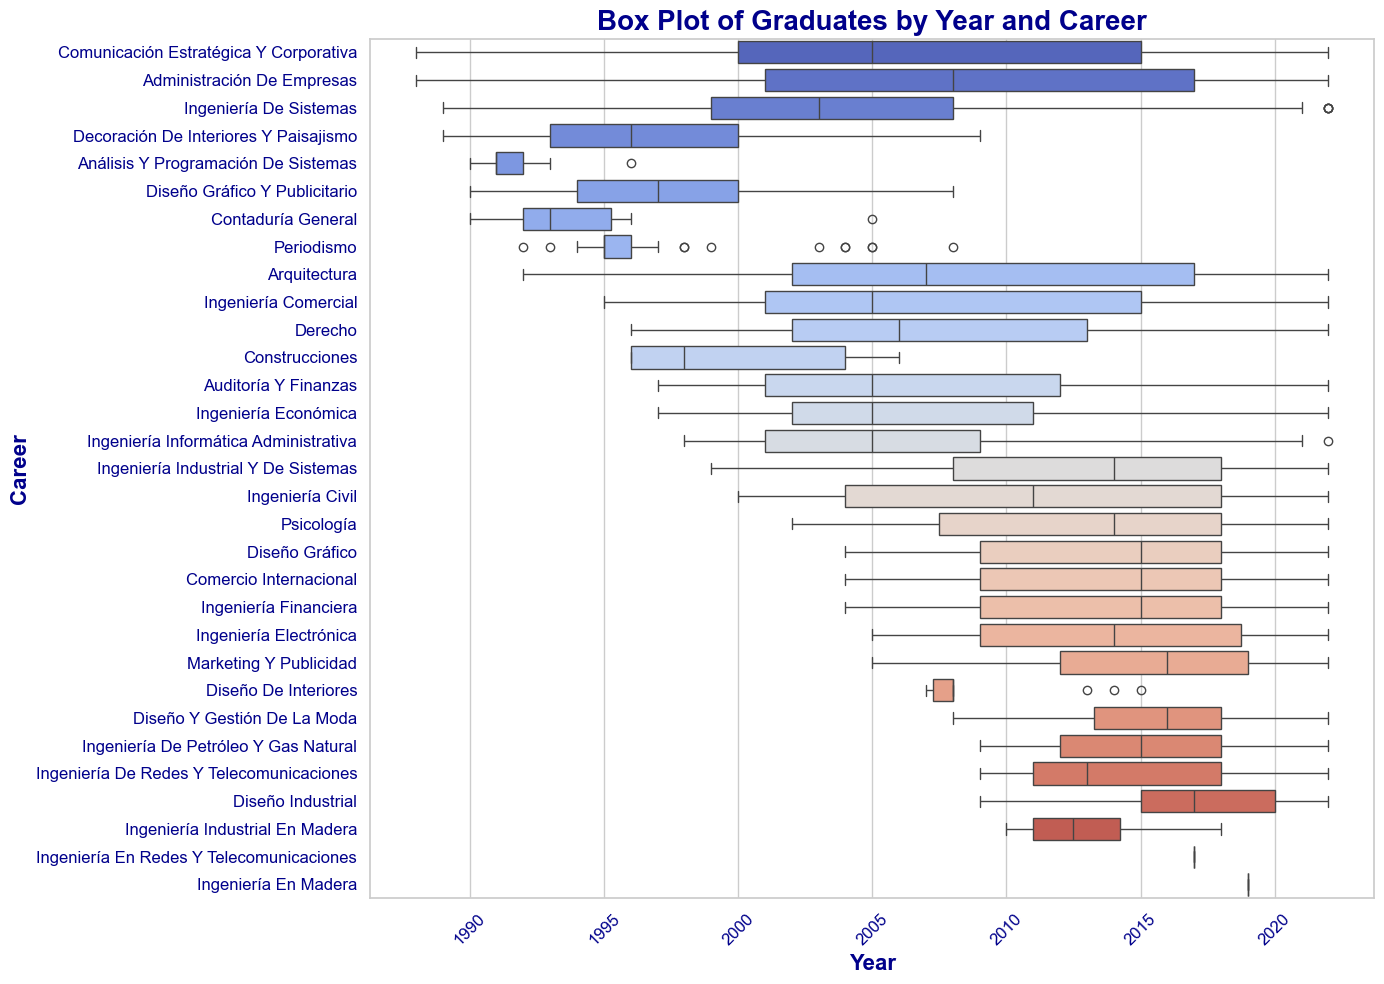

C:\Users\Jassiel\AppData\Local\Temp\ipykernel_4784\1058987902.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Año", y="Carrera", data=consolidated_graduate_data, palette="coolwarm")


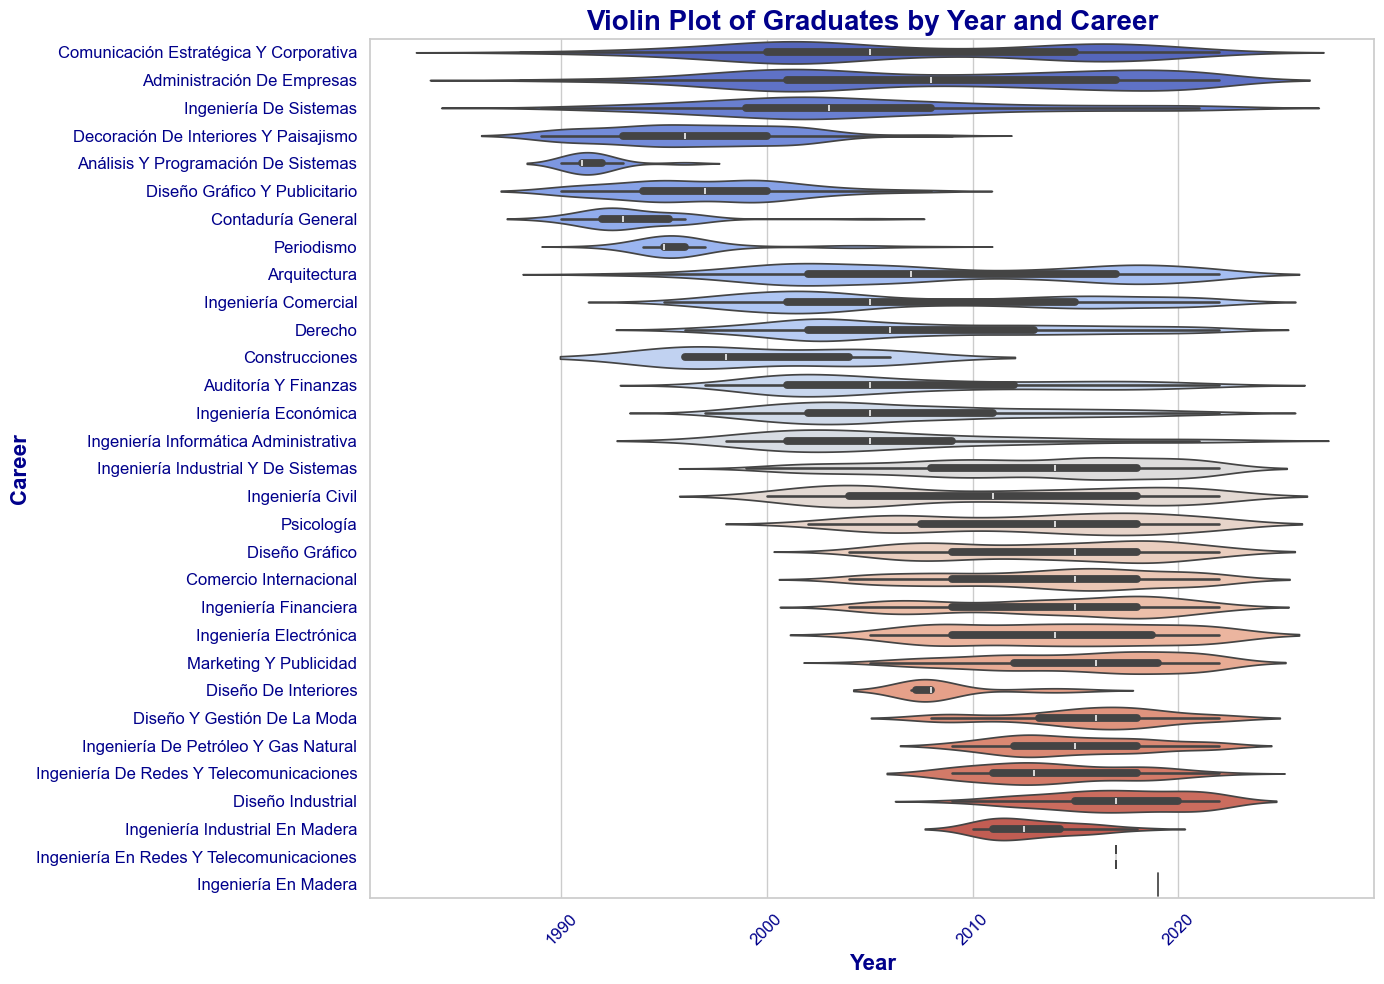

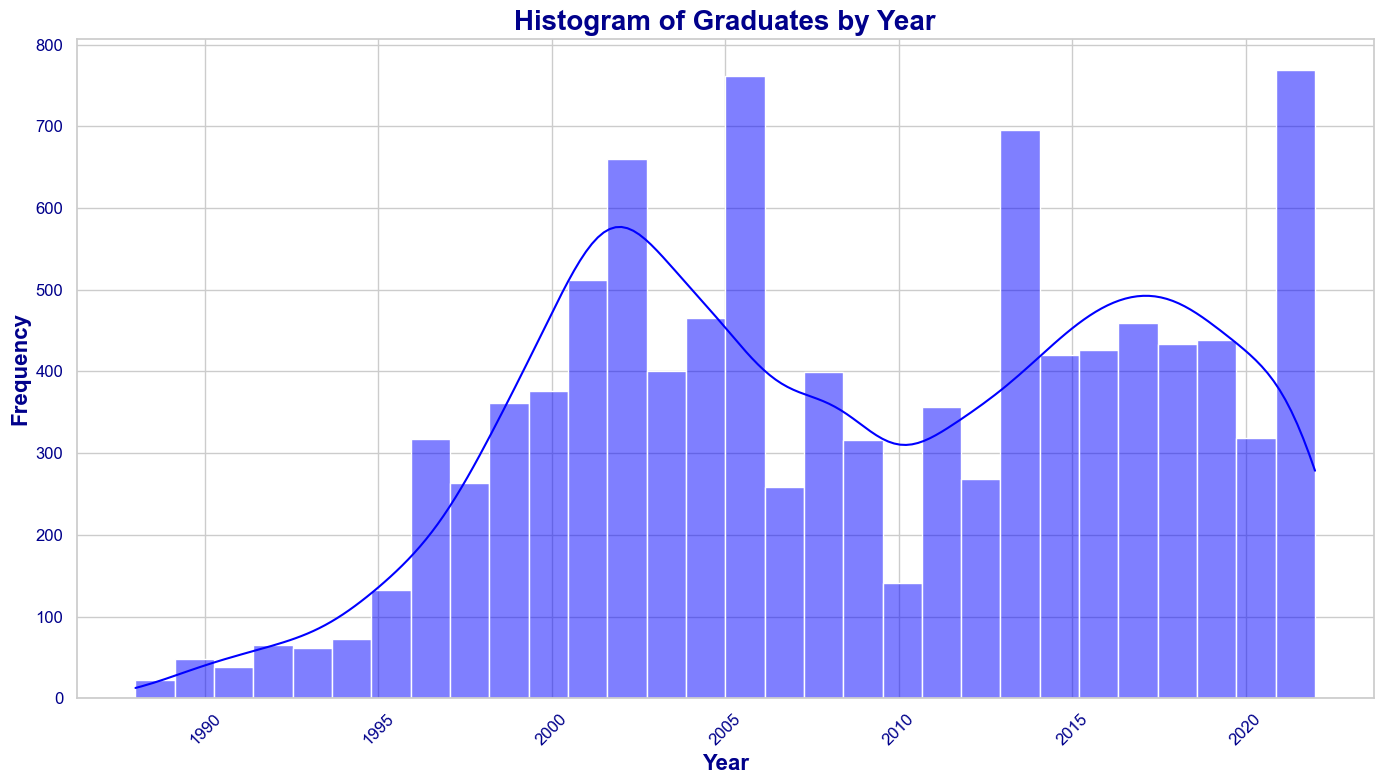

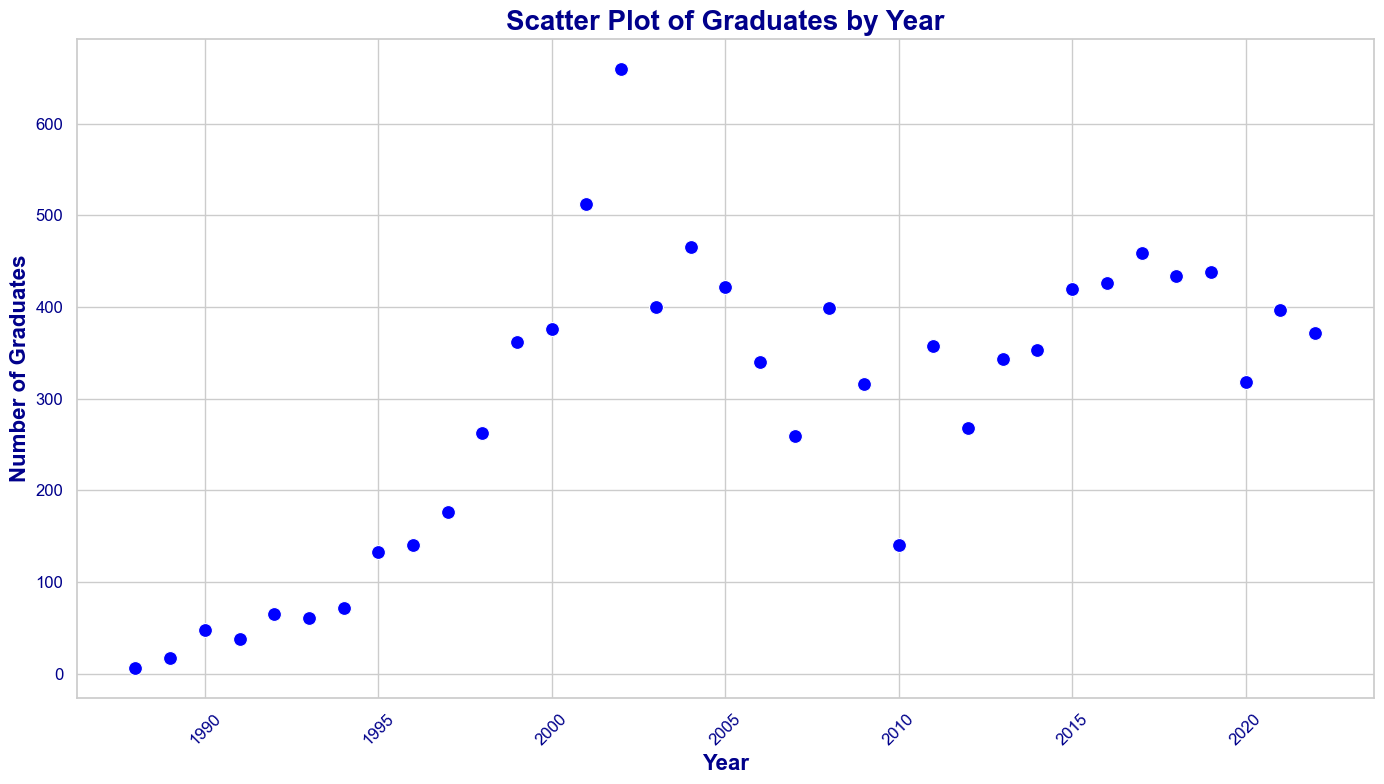

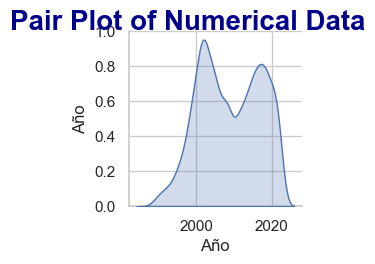

In [15]:
# Assuming consolidated_graduate_data is already loaded and cleaned

# Set the style
sns.set_theme(style="whitegrid")

# Box Plot for the distribution of graduates by year and career
plt.figure(figsize=(14, 10))
sns.boxplot(x="Año", y="Carrera", data=consolidated_graduate_data, palette="coolwarm")
plt.title("Box Plot of Graduates by Year and Career", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Year", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Career", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.tight_layout()
plt.show()

# Violin Plot for the distribution and density of graduates by year and career
plt.figure(figsize=(14, 10))
sns.violinplot(x="Año", y="Carrera", data=consolidated_graduate_data, palette="coolwarm")
plt.title("Violin Plot of Graduates by Year and Career", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Year", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Career", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.tight_layout()
plt.show()

# Histogram for the frequency distribution of graduates by year
plt.figure(figsize=(14, 8))
sns.histplot(consolidated_graduate_data["Año"], bins=30, kde=True, color="blue")
plt.title("Histogram of Graduates by Year", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Year", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Frequency", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.tight_layout()
plt.show()

# Scatter Plot for the relationship between the number of graduates and the year
graduates_per_year = consolidated_graduate_data["Año"].value_counts().sort_index()
plt.figure(figsize=(14, 8))
sns.scatterplot(x=graduates_per_year.index, y=graduates_per_year.values, s=100, color="blue", marker="o")
plt.title("Scatter Plot of Graduates by Year", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Year", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Number of Graduates", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pair Plot for pairwise relationships in the dataset
# For this, we need to select numerical columns only
numerical_data = consolidated_graduate_data[["Año"]]
sns.pairplot(numerical_data, diag_kind="kde", plot_kws={"s": 50, "alpha": 0.5})
plt.suptitle("Pair Plot of Numerical Data", fontsize=20, fontweight='bold', color='darkblue', y=1.02)
plt.show()

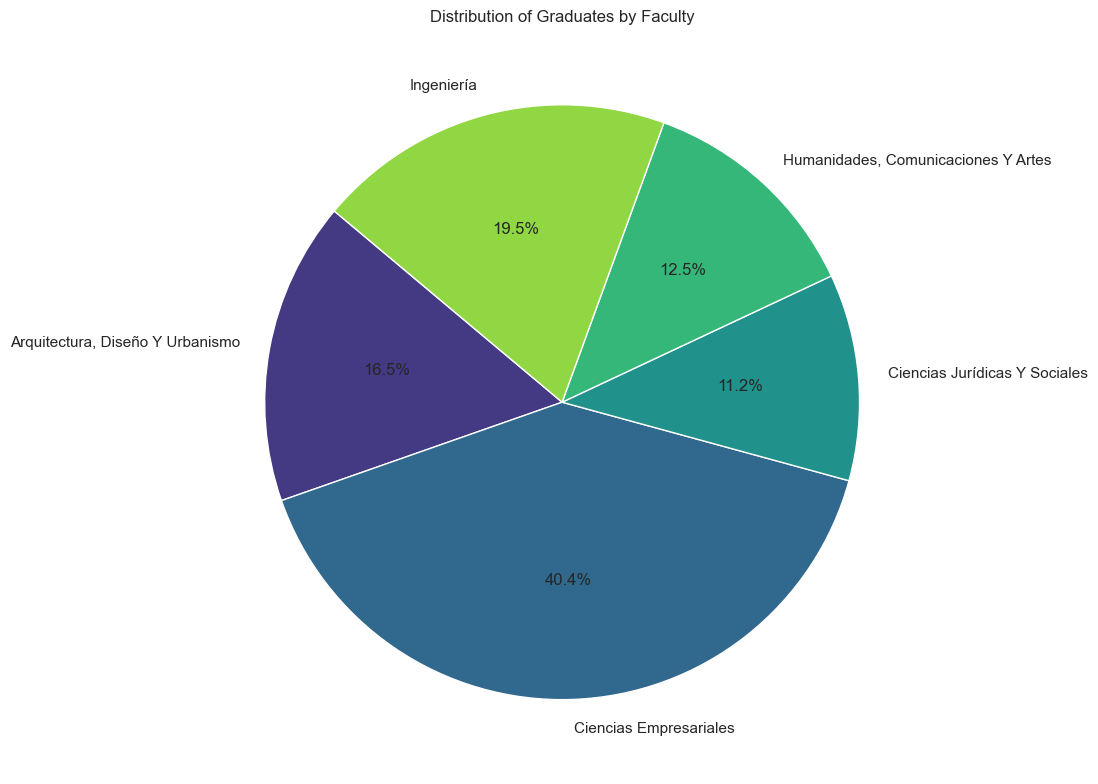

NameError: name 'career_counts' is not defined

<Figure size 1200x1200 with 0 Axes>

In [16]:
# Pie chart for the distribution of graduates by faculty
plt.figure(figsize=(10, 8))
graduates_per_faculty.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(graduates_per_faculty)))
plt.title("Distribution of Graduates by Faculty")
plt.ylabel('')
plt.tight_layout()
plt.show()

# Pie chart for the distribution of graduates by career
plt.figure(figsize=(12, 12))
career_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(career_counts)))
plt.title("Distribution of Graduates by Career")
plt.ylabel('')
plt.tight_layout()
plt.show()

C:\Users\Jassiel\AppData\Local\Temp\ipykernel_12688\1131873158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Año", y="Facultad", data=consolidated_graduate_data, palette="viridis")


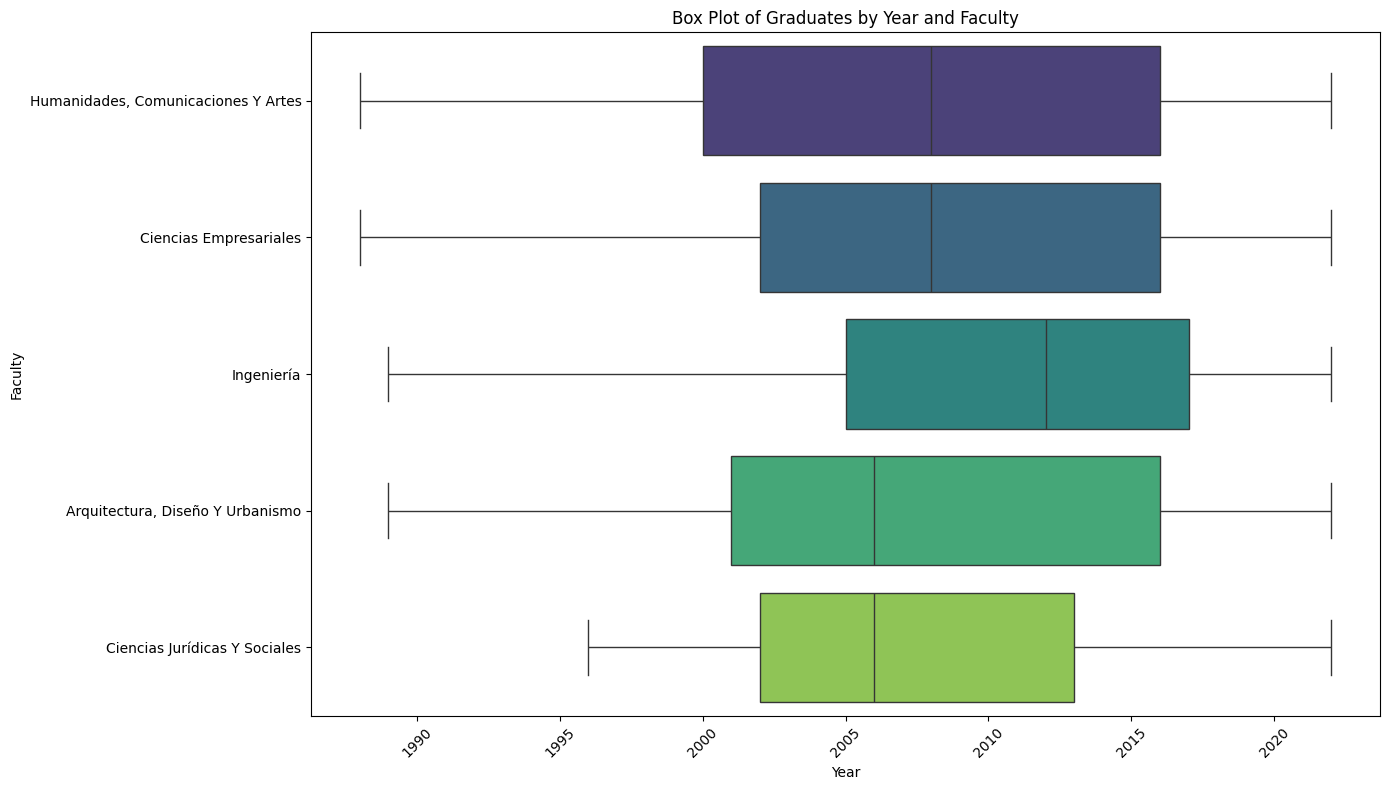

C:\Users\Jassiel\AppData\Local\Temp\ipykernel_12688\1131873158.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Año", y="Carrera", data=consolidated_graduate_data, palette="viridis")


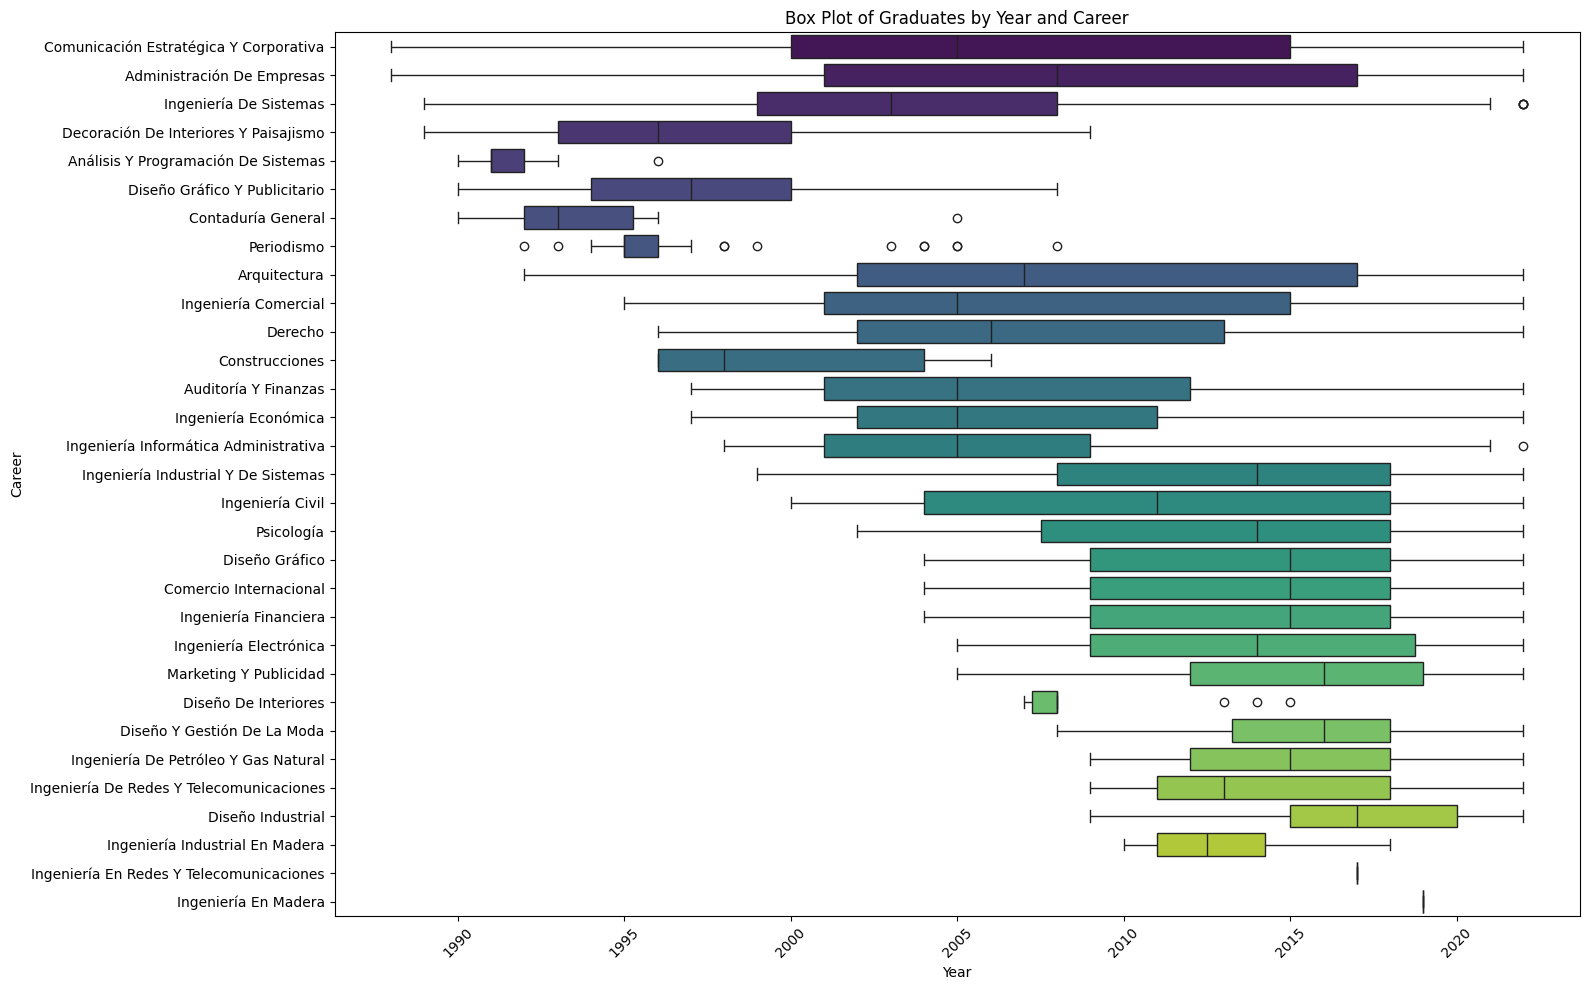

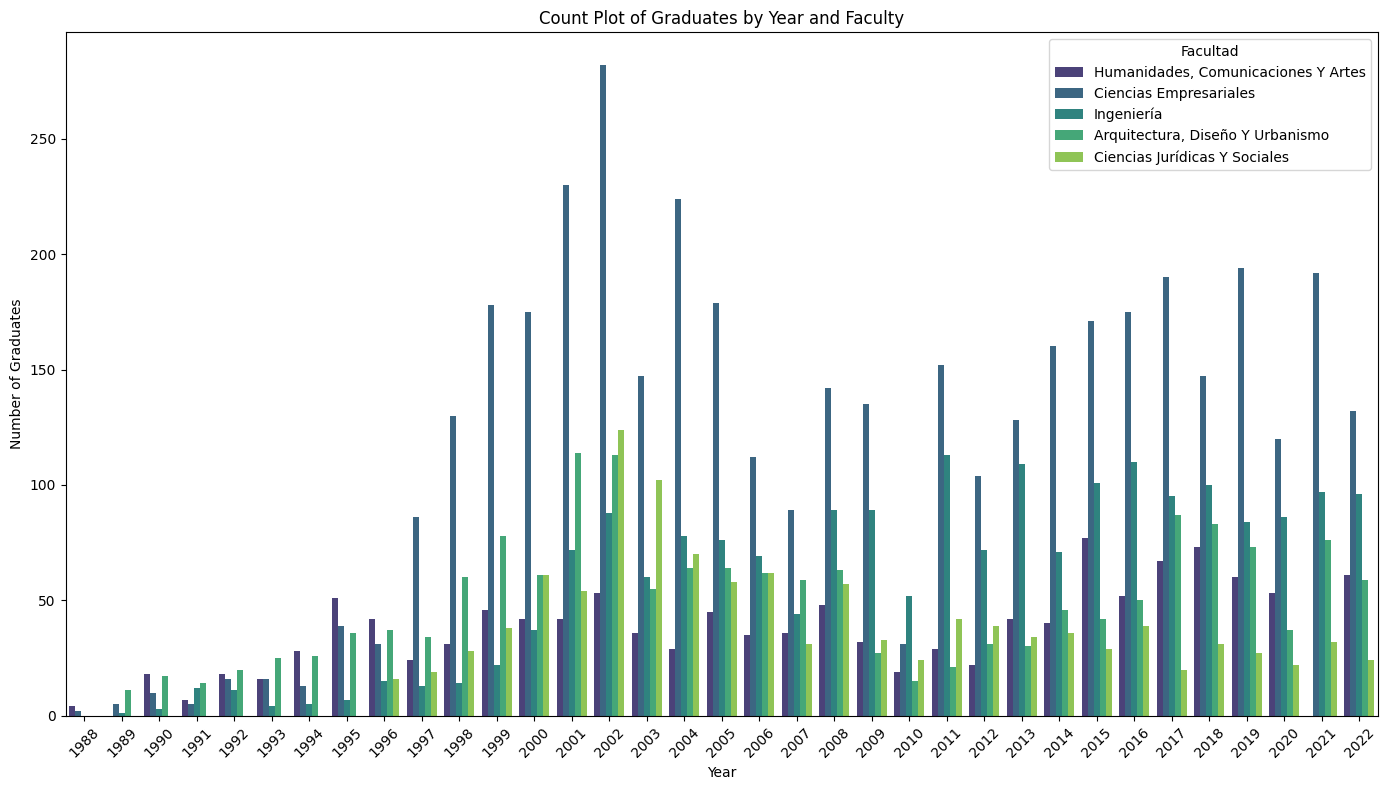

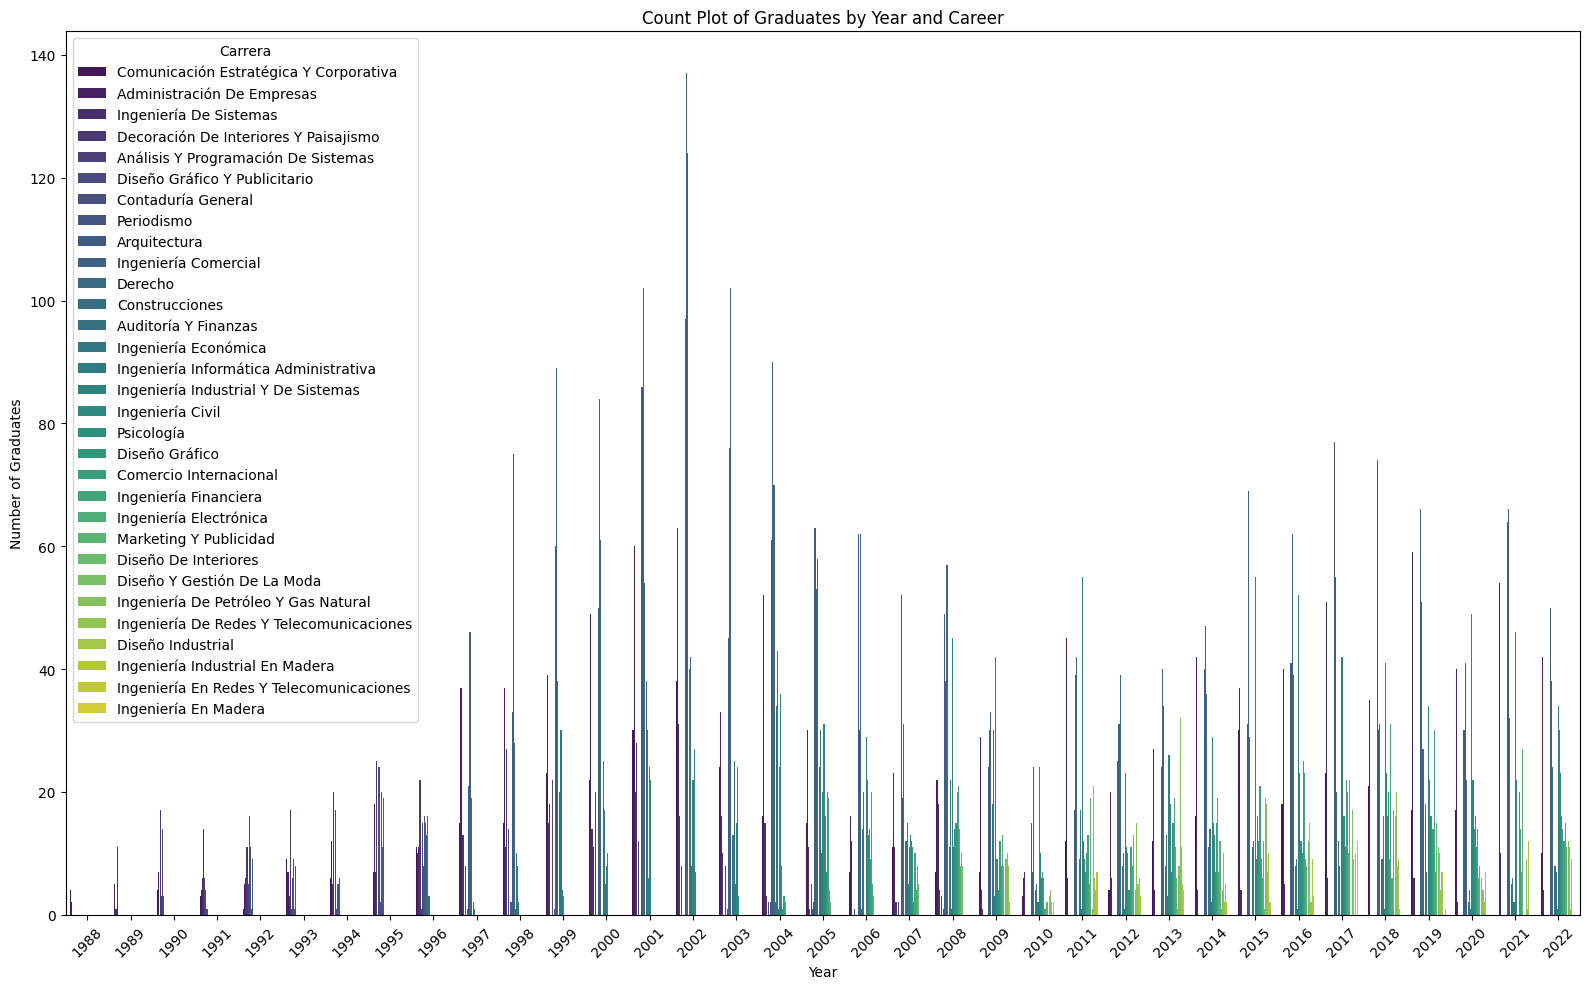

In [ ]:
# Box plot for the distribution of graduates by year and faculty
plt.figure(figsize=(14, 8))
sns.boxplot(x="Año", y="Facultad", data=consolidated_graduate_data, palette="viridis")
plt.title("Box Plot of Graduates by Year and Faculty")
plt.xlabel("Year")
plt.ylabel("Faculty")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box plot for the distribution of graduates by year and career
plt.figure(figsize=(16, 10))
sns.boxplot(x="Año", y="Carrera", data=consolidated_graduate_data, palette="viridis")
plt.title("Box Plot of Graduates by Year and Career")
plt.xlabel("Year")
plt.ylabel("Career")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Count plot for the number of graduates by year and faculty
plt.figure(figsize=(14, 8))
sns.countplot(x="Año", hue="Facultad", data=consolidated_graduate_data, palette="viridis")
plt.title("Count Plot of Graduates by Year and Faculty")
plt.xlabel("Year")
plt.ylabel("Number of Graduates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Count plot for the number of graduates by year and career
plt.figure(figsize=(16, 10))
sns.countplot(x="Año", hue="Carrera", data=consolidated_graduate_data, palette="viridis")
plt.title("Count Plot of Graduates by Year and Career")
plt.xlabel("Year")
plt.ylabel("Number of Graduates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()